# **Practical use case of Hierarchical, BDSCAN, K- Means Clustering:**

## Mall_Customers Dataset

Credit and more on this:   [Youtube tutorial](https://www.youtube.com/watch?v=lQt92mh0N8I)

Link to the : [Kaggle dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers?resource=download)

Theoretical lessons about the algorithms:<br/>
[K Means Clustering](https://www.youtube.com/watch?v=YIGtalP1mv0) <br/>
[Hierarchical Clustering](https://www.youtube.com/watch?v=ijUMKMC4f9I)<br/>
[DBSCAN](https://www.youtube.com/watch?v=RDZUdRSDOok)

##**Task:** Grouping Customers based on Age and Income

### **Import libraries**

In [204]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###  **import dataset**

In [205]:
# import dataset
mall_customers = pd.read_csv('Mall_Customers.csv')

### **view the first 10 rows of the dataset**

In [206]:
mall_customers.head(n = 10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


###**Basic exploratory analysis:**

In [207]:
# shape of the subset data
mall_customers_subset.shape

(200, 2)

In [208]:
# check for missing values
mall_customers_subset.isna().sum()

Age                   0
Annual Income (k$)    0
dtype: int64

### **subset the data using age and income**

In [209]:
mall_customers_subset = mall_customers.loc[:, ['Age', 'Annual Income (k$)']]

### **Plot the data subset**

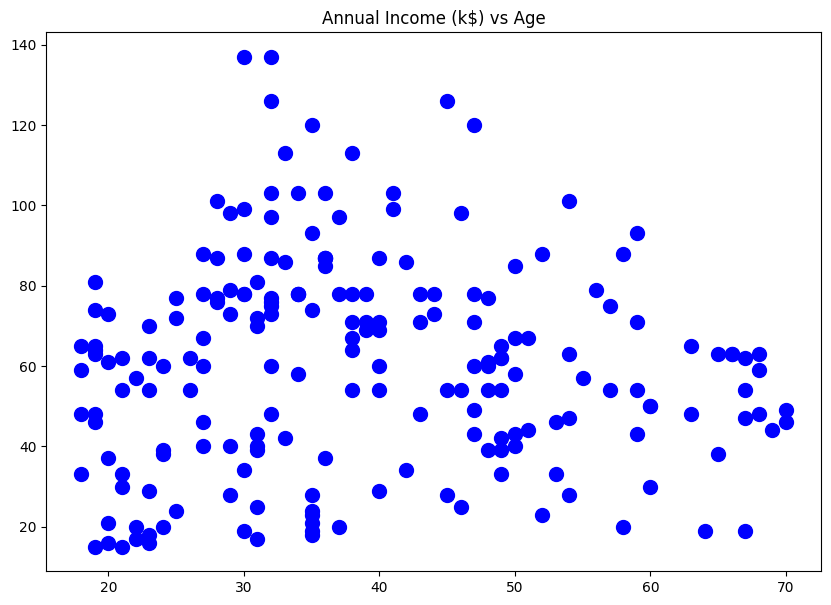

In [210]:
plt.figure(figsize = (10, 7))
plt.scatter(mall_customers_subset[['Age']], mall_customers_subset[['Annual Income (k$)']], s=100, c='blue')
plt.title("Annual Income (k$) vs Age");

### **Create the Dendogram**

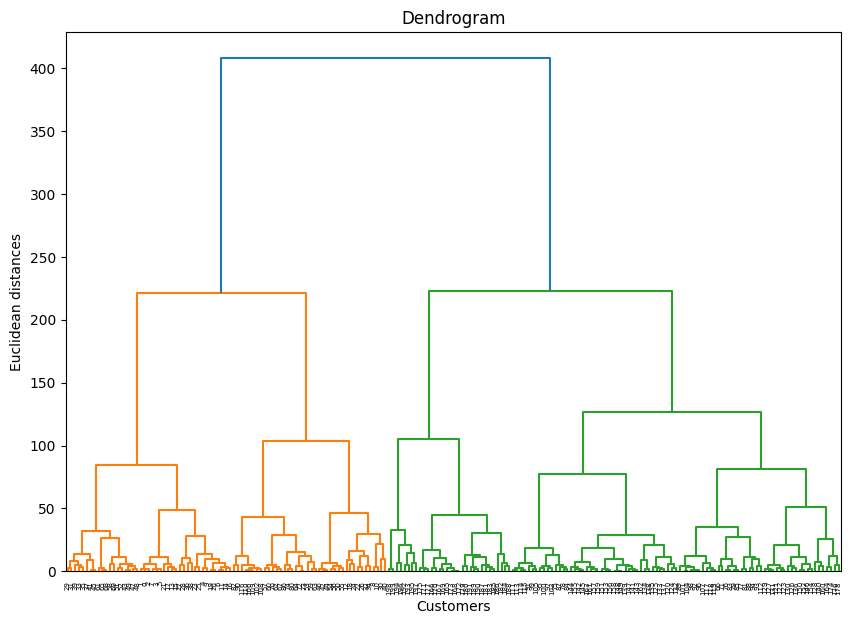

In [211]:
# create a dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(mall_customers_subset, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show();

# check for largest distance vertically without crossing any horizontal line

### **Perform the acutal clustering**

In [212]:
# clustering with the distance metrics
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage='ward')

In [213]:
# fit and predict which cluster the points belong
cl = cluster.fit_predict(mall_customers_subset)
cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### **Metrics**

For more on silhouette score: [sckit-learn.org](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


[wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters.)

In [214]:
from sklearn.metrics import silhouette_score

**Silhouette Coefficient or silhouette score:** is
a metric used to calculate the goodness of a
clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and
clearly distinguished

#### **Silhouette score for Hierarchical:**

In [215]:
"""
Silhouette Coefficient or silhouette score is
a metric used to calculate the goodness of a
clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and
clearly distinguished.
"""

silhouette_score(mall_customers_subset,cl)

0.4104652474372429

In [216]:
# assign the values to a variable X in the form or array
X = mall_customers_subset.values

### **plot from the Agglomerative clustering**

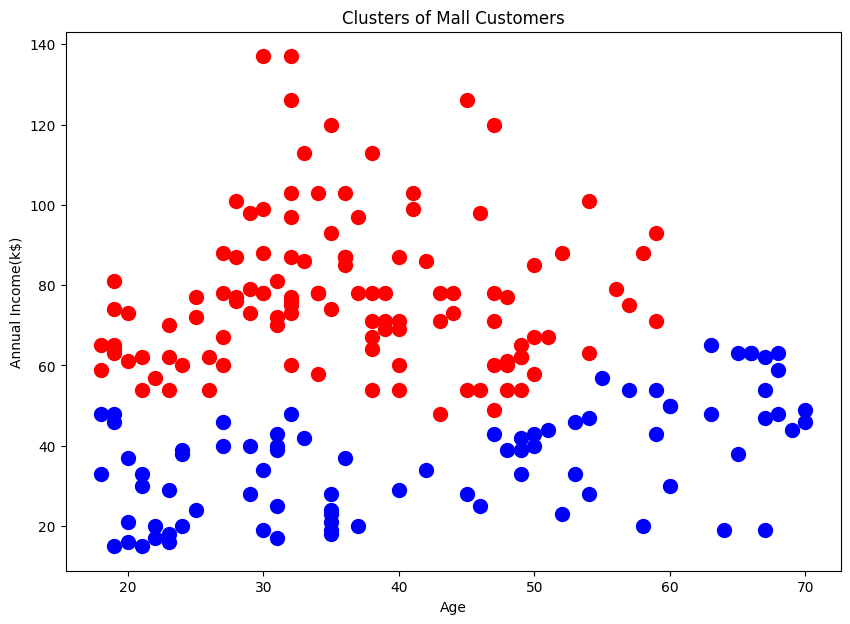

In [217]:
# plot the clusters from Agglomerative clustering
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()

# **DBSCAN**

In [218]:
# using DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

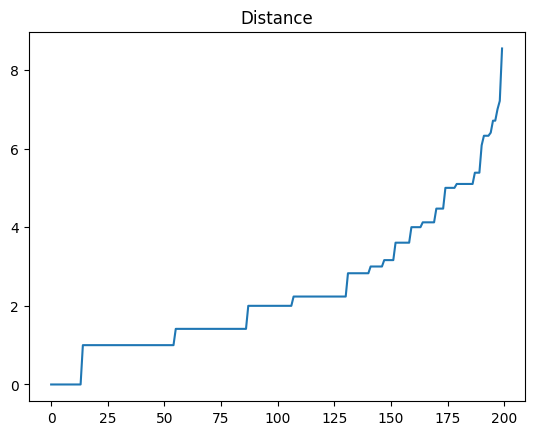

In [219]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Distance')
plt.show();

In [220]:
# import the DBSCAN from sklearn
from sklearn.cluster import DBSCAN
# assign epsilon and minimum samples
dbscancluster = DBSCAN(eps=7, min_samples=5)
# fit the values
dbscancluster.fit(X)
# get the cluster labels
clusters = dbscancluster.labels_

In [221]:
# check how many clusters labels are there in the cluster variable
len(set(clusters))

3

#### **Silhouette score for DBsCAN:**

In [222]:
# check the silhouetter score and compare to the previous result of Hierarchical
silhouette_score(X,clusters)

0.28705019416571775

# **K_Means**

**The elbow method:** is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [223]:
# import kmeans algorithm
from sklearn.cluster import KMeans

### **Elbow method to find the best cluster**

In [224]:
# create an empty list to save the scores
individual_clustering_score = []

# iterate and save the values in the list
for i in range(1,15):
  # set the parameters for the Kmeans algorithm
  kmeans = KMeans(n_clusters = i, init = 'random', random_state=42)
  # fit the values of X
  kmeans.fit(X)
  # append the values predicted
  individual_clustering_score.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### **Plot the elbow graph**

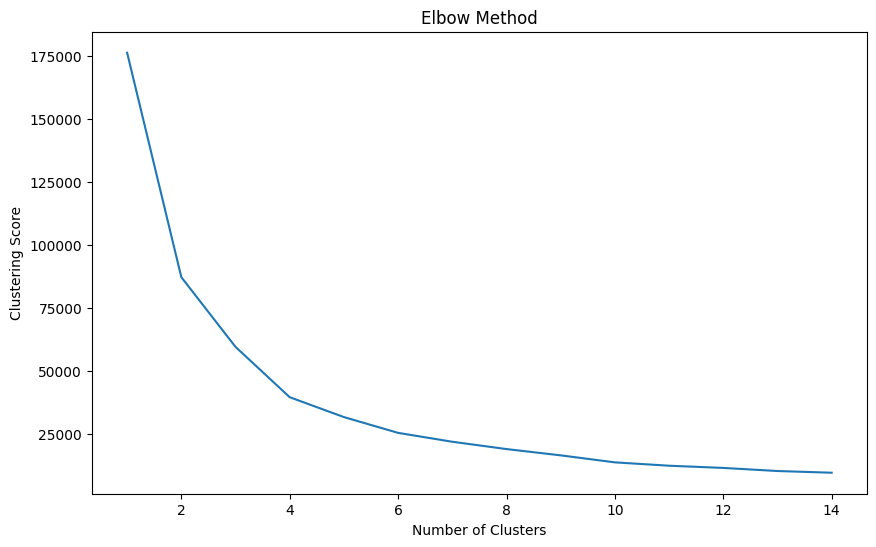

In [225]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

### **Fit and predict**

In [226]:
# Fit the model and predict
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 'auto')

# fit the values of X
kmeans.fit(X)

# predict
pred = kmeans.predict(X)

pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

#### **Silhouette score for Kmeans:**

In [227]:
# output the silhouette score for kmeans
silhouette_score(X,pred)

0.4152708751192702

# **Feature Engineer the dataset to improve performance**

Note: This step is usually perform first at the beginnig of most datascience, machine & deep learning, and AI tasks.<br/>
For more or feature engineering: [Books](https://www.amazon.it/s?k=feature+engineering+book&__mk_it_IT=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1PKCD5XBNXBMW&sprefix=feature+engineering+book%2Caps%2C142&ref=nb_sb_noss)

#### **Normalize our dataset**

In [228]:
# normalize the data
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


### **Kmeans on the scaled data**

In [229]:
# Fit the model and predict
kmeans = KMeans(n_clusters = 2, random_state = 42, n_init = 'auto')

# fit the values of scaled
kmeans.fit(scaled)

# predict
pred = kmeans.predict(scaled)

pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [230]:
# output the silhouette score for kmeans on scaled data
silhouette_score(scaled,pred)

0.642036722568442